## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [122]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris


In [55]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
movie_data_erd.jpeg
student.ipynb
zippedData


In [56]:
df_budget= pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz', compression='gzip')

In [57]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [68]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [58]:
df_movies = pd.read_csv(r'zippedData\tmdb.movies.csv.gz', compression='gzip')

In [59]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [69]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [60]:
df_review = pd.read_csv(r'zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')
#df_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin1')

In [61]:
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [70]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [62]:
import sqlite3

In [63]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [64]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [65]:
df_movie_info = pd.read_csv(r'zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')


In [66]:
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [71]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [67]:
df_bom = pd.read_csv(r'zippedData/bom.movie_gross.csv.gz', compression='gzip')

In [54]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [72]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [73]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [90]:
df_new= pd.read_sql("""
SELECT *
  FROM movie_basics
""", conn)

In [92]:
df_new

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [93]:
df_new= pd.read_sql("""
SELECT primary_title,original_title,runtime_minutes,averagerating
  FROM movie_basics
  JOIN movie_ratings
      USING(movie_id)
""", conn)

In [95]:
len(df_new)

73856

In [96]:
df_new.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [97]:
df_new.to_excel("Movies with ratings.xlsx") 

In [100]:
df_db= pd.read_sql("""
SELECT *
  FROM persons
""", conn)

In [101]:
df_db

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [110]:
df_dir= pd.read_sql("""
SELECT m.movie_id,m.primary_title,m.original_title,p.primary_name
  FROM movie_basics as m
  JOIN directors as d
      USING(movie_id)
  JOIN persons as p
      USING(person_id)
""", conn)

In [111]:
df_dir

,movie_id,primary_title,original_title,primary_name
0,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail
1,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail
2,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail
3,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Mani Kaul
...,...,...,...,...
291166,tt9916730,6 Gunn,6 Gunn,Kiran Gawade
291167,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Vinicius Augusto Bozzo
291168,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Vinicius Augusto Bozzo
291169,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,Angela Gurgel


In [112]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [113]:
df_new= pd.read_sql("""
SELECT primary_title,original_title,runtime_minutes,averagerating
  FROM movie_basics
  JOIN movie_ratings
      USING(movie_id)
""", conn)

In [114]:
df_new

,primary_title,original_title,runtime_minutes,averagerating
0,Sunghursh,Sunghursh,175.0,7.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,7.2
2,The Other Side of the Wind,The Other Side of the Wind,122.0,6.9
3,Sabse Bada Sukh,Sabse Bada Sukh,NaN,6.1
4,The Wandering Soap Opera,La Telenovela Errante,80.0,6.5
...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,75.0,6.2
73852,Sokagin Çocuklari,Sokagin Çocuklari,98.0,8.7
73853,Albatross,Albatross,NaN,8.5
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,NaN,6.6


In [115]:
merged_ratings_and_budgets = df_budget.merge(df_new, left_on='movie', right_on='primary_title', how='left')

In [116]:
merged_ratings_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,runtime_minutes,averagerating
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,Abatâ,93.0,6.1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,6.6
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,Dark Phoenix,113.0,6.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,7.3
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN


In [117]:
merged_ratings_and_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473 entries, 0 to 6472
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6473 non-null   int64  
 1   release_date       6473 non-null   object 
 2   movie              6473 non-null   object 
 3   production_budget  6473 non-null   object 
 4   domestic_gross     6473 non-null   object 
 5   worldwide_gross    6473 non-null   object 
 6   primary_title      2875 non-null   object 
 7   original_title     2875 non-null   object 
 8   runtime_minutes    2757 non-null   float64
 9   averagerating      2875 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 556.3+ KB


In [119]:
merged_ratings_and_budgets.isna().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
primary_title        3598
original_title       3598
runtime_minutes      3716
averagerating        3598
dtype: int64

In [120]:
df_clean = merged_ratings_and_budgets.dropna(subset=['averagerating'])

In [121]:
df_clean.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
primary_title          0
original_title         0
runtime_minutes      118
averagerating          0
dtype: int64

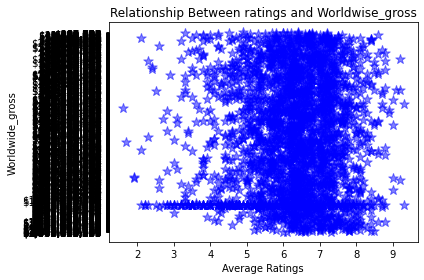

In [126]:
fig, ax = plt.subplots(figsize=(6, 4))

# These are all arguments that go in the plot's function
ax.scatter(df_clean['averagerating'], df_clean['worldwide_gross'],
           c='blue',
           alpha=0.5,
           s=100,
           marker='*')

ax.set_xlabel('Average Ratings')
ax.set_ylabel('Worldwide_gross')
ax.set_title('Relationship Between ratings and Worldwise_gross')

plt.tight_layout()


In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 6471
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   movie              2875 non-null   object 
 3   production_budget  2875 non-null   object 
 4   domestic_gross     2875 non-null   object 
 5   worldwide_gross    2875 non-null   object 
 6   primary_title      2875 non-null   object 
 7   original_title     2875 non-null   object 
 8   runtime_minutes    2757 non-null   float64
 9   averagerating      2875 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 247.1+ KB


In [139]:
df_clean['worldwide_gross']

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
6       2.048134e+09
            ...     
6452    0.000000e+00
6458    9.459600e+04
6463    4.584000e+03
6468    0.000000e+00
6471    0.000000e+00
Name: worldwide_gross, Length: 2875, dtype: float64

In [138]:
df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace(",", "")
df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace("$", "").astype(float)


<ipython-input-138-850e5f5dc842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace(",", "")
<ipython-input-138-850e5f5dc842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace("$", "").astype(float)


In [141]:
x = df_clean['averagerating'] 
y = df_clean['worldwide_gross']


r = np.corrcoef(x, y)
r

array([[1.        , 0.16567478],
       [0.16567478, 1.        ]])